# Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('D5data3.csv')
dataset

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,204
67,77,205
68,78,206
69,79,207


In [4]:
dataset.shape

(71, 2)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     71 non-null     int64
 1   Height  71 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [6]:
dataset.describe()

,Age,Height
count,71.000000,71.000000
mean,45.000000,160.873239
std,20.639767,20.842902
min,10.000000,138.000000
25%,27.500000,143.500000
50%,45.000000,155.000000
75%,62.500000,171.500000
max,80.000000,208.000000


In [15]:
#Independent variable
X=dataset.iloc[:,:-1].values

#Dependent variable
y=dataset.iloc[:,1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

In [17]:
#Apply Linear Regression
from sklearn.linear_model import LinearRegression
LinMode = LinearRegression()
LinMode.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Height')

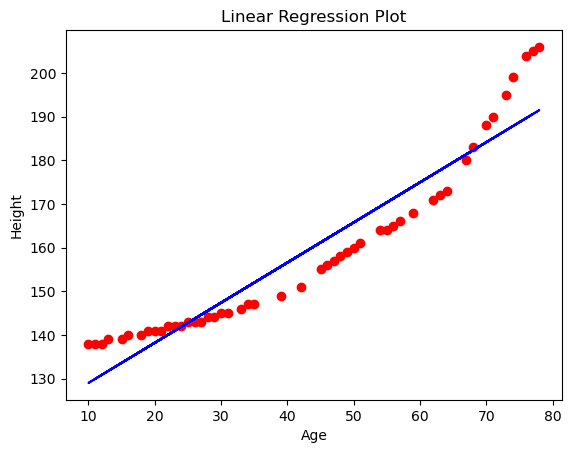

In [20]:
plt.scatter(X_train,y_train,c='red')
plt.plot(X_train,LinMode.predict(X_train), color='blue')
plt.title('Linear Regression Plot')
plt.xlabel('Age')
plt.ylabel('Height')

In [45]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
Polynom = PolynomialFeatures(degree = 3 )
X_Polynom = Polynom.fit_transform(X_train)
X_Polynom

array([[1.00000e+00, 1.20000e+01, 1.44000e+02, 1.72800e+03],
       [1.00000e+00, 5.00000e+01, 2.50000e+03, 1.25000e+05],
       [1.00000e+00, 2.10000e+01, 4.41000e+02, 9.26100e+03],
       [1.00000e+00, 1.30000e+01, 1.69000e+02, 2.19700e+03],
       [1.00000e+00, 6.40000e+01, 4.09600e+03, 2.62144e+05],
       [1.00000e+00, 5.50000e+01, 3.02500e+03, 1.66375e+05],
       [1.00000e+00, 2.00000e+01, 4.00000e+02, 8.00000e+03],
       [1.00000e+00, 5.10000e+01, 2.60100e+03, 1.32651e+05],
       [1.00000e+00, 5.90000e+01, 3.48100e+03, 2.05379e+05],
       [1.00000e+00, 6.30000e+01, 3.96900e+03, 2.50047e+05],
       [1.00000e+00, 6.70000e+01, 4.48900e+03, 3.00763e+05],
       [1.00000e+00, 4.20000e+01, 1.76400e+03, 7.40880e+04],
       [1.00000e+00, 2.40000e+01, 5.76000e+02, 1.38240e+04],
       [1.00000e+00, 7.80000e+01, 6.08400e+03, 4.74552e+05],
       [1.00000e+00, 2.90000e+01, 8.41000e+02, 2.43890e+04],
       [1.00000e+00, 3.90000e+01, 1.52100e+03, 5.93190e+04],
       [1.00000e+00, 6.2

In [46]:
#Fitting into the Model
PolyModel = LinearRegression()
PolyModel.fit(X_Polynom,y_train)

LinearRegression()

Text(0, 0.5, 'Height')

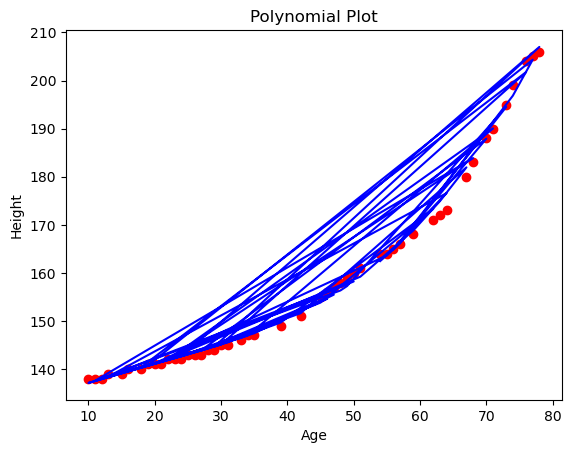

In [47]:
# Visualize the training data
plt.scatter(X_train,y_train, c='red')
plt.plot(X_train,PolyModel.predict(X_Polynom),color='blue')
plt.title('Polynomial Plot')
plt.xlabel('Age')
plt.ylabel('Height')

Text(0, 0.5, 'Height')

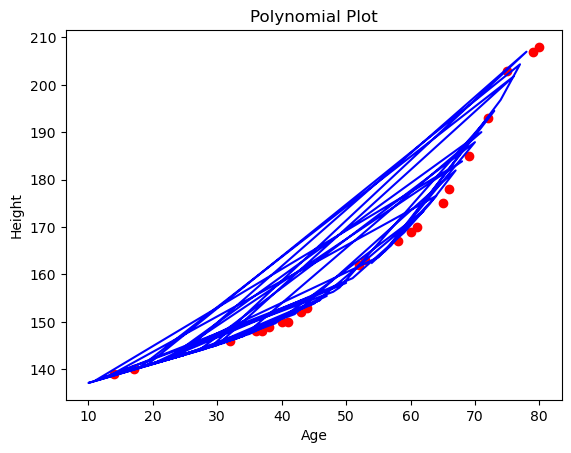

In [48]:
# Visualize the testing data
plt.scatter(X_test,y_test, c='red')
plt.plot(X_train,PolyModel.predict(X_Polynom),color='blue')
plt.title('Polynomial Plot')
plt.xlabel('Age')
plt.ylabel('Height')

In [49]:
# Prediction  for Linear Model
y_pred = LinMode.predict(X_test)

In [50]:
y_pred

array([152.90005813, 153.8194466 , 173.1266044 , 149.22250426,
       156.577612  , 175.8847698 , 135.43167726, 183.23987754,
       160.25516587, 193.35315067, 180.48171214, 154.73883506,
       157.49700047, 167.6102736 , 159.3357774 , 179.56232367,
       192.43376221, 185.99804294, 168.52966207, 132.67351186,
       188.75620834, 174.96538134])

In [51]:
# Evaluation Metric for Linear Model
from sklearn import metrics
r_square = metrics.r2_score(y_test,y_pred)
r_square

0.8727873738671587

In [52]:
# Prediction for Polynomial Model
y_pred = PolyModel.predict(Polynom.fit_transform(X_test))
y_pred

array([147.97547568, 148.52117963, 167.46220582, 145.99254438,
       150.30111056, 171.76313235, 140.04590688, 185.85318763,
       153.06100265, 212.54795283, 180.09405903, 149.08973307,
       150.94679566, 160.24977292, 152.32531118, 178.30492633,
       209.72795606, 192.22995301, 161.33273189, 138.85552893,
       199.26297936, 170.27421543])

In [53]:
# Evaluation Metric for Polynomial Model
from sklearn import metrics
r_square = metrics.r2_score(y_test,y_pred)
r_square

0.9927634092096039